# Predicting heart disease using machine learning

This notebook looks into using various machine learning and data science libraries in an attempt to build an end to end heart disease detection model

We're going to use the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem defintion

> Given clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Data 

>The dataset I have used is taken from KAGGLE
>https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?select=heart_cleveland_upload.csv

## 3. Evaluation

>If we reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## Features

This is where you'll get different information about each feature of the dataset

**Create data dictionary**

There are 13 attributes

1. age: age in years

2. sex: sex (1 = male; 0 = female)

3. cp: chest pain type
> * Value 0: typical angina
> * Value 1: atypical angina
> * Value 2: non-anginal pain
> * Value 3: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholestoral in mg/dl

6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. restecg: resting electrocardiographic results
> * Value 0: normal
> * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
> * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment
> * Value 0: upsloping
> * Value 1: flat
> * Value 2: downsloping

12. ca: number of major vessels (0-3) colored by flourosopy

13. thal: 
> * 0 = normal; 
> * 1 = fixed defect; 
> * 2 = reversable defect and the label

14. condition: 
> * 0 = no disease, 
> * 1 = disease

## Preparing the tools

In [110]:
# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
import klib

%matplotlib inline 
# for plots to appear inside our notebook

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

#Model evaluations and metrics from scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, RocCurveDisplay,roc_curve, auc

## Load Data

In [2]:
data = pd.read_csv("heart_cleveland_upload.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
data.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

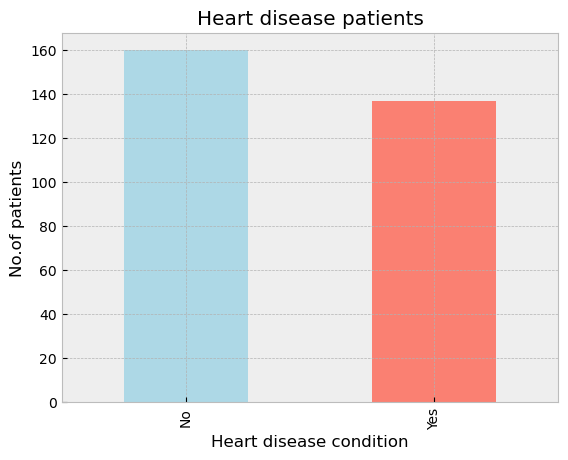

In [4]:
# How many samples of 1 and 0 we have
ax = data["condition"].value_counts().plot(kind="bar",
                                           color=["lightblue","salmon"],
                                           xlabel="Heart disease condition",
                                          ylabel="No.of patients");
ax.set_xticks([0, 1])  # Set the tick positions
ax.set_xticklabels(['No', 'Yes']); # Set the corresponding labels
plt.title('Heart disease patients');

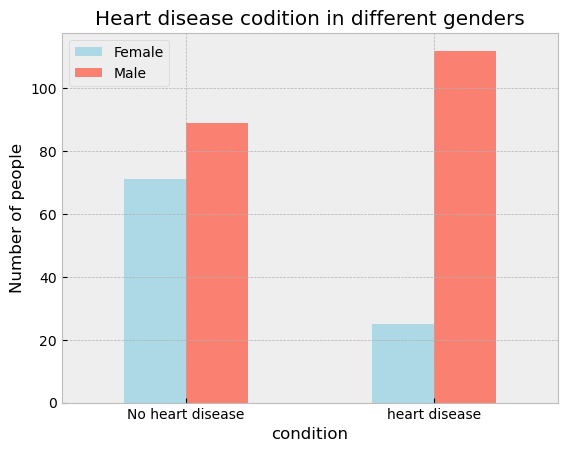

In [5]:
# Plot heart condition with respect to sex
plotdata = pd.crosstab(data.condition,data.sex)
ax1 = plotdata.plot.bar(color=["lightblue","salmon"],
                       ylabel="Number of people")
ax1.legend(["Female","Male"])
ax1.set_xticks([0,1])  # Set the tick positions
ax1.set_xticklabels(['No heart disease', 'heart disease'],rotation=0); # Set the corresponding labels
plt.title('Heart disease codition in different genders');

In [6]:
#missing values count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Males are at a higher risk than females for heart diseases

### Age vs Max heart rate

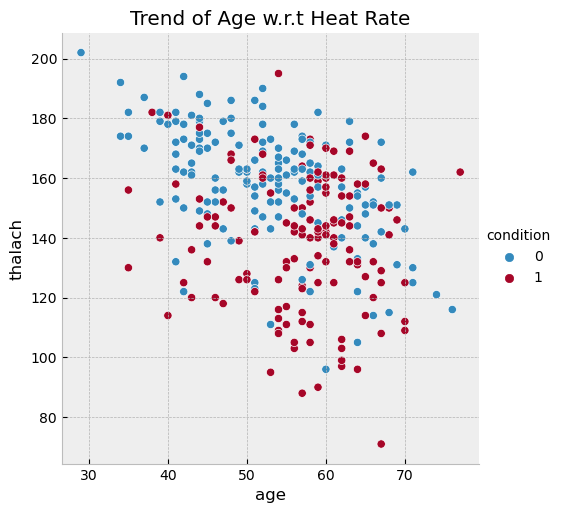

In [7]:
sns.relplot(x='age',y='thalach',data=data,hue='condition');
plt.title('Trend of Age w.r.t Heat Rate');

Kind of a downward trend seen with higher rates of heart diseases cummulative near the right side of graph i.e.age more than 50

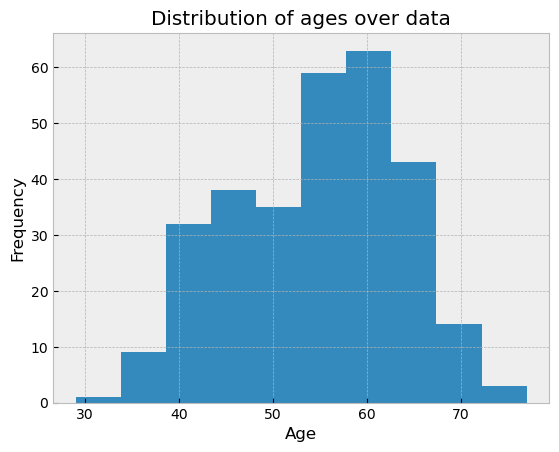

In [8]:
data['age'].plot.hist()
plt.xlabel('Age');
plt.title('Distribution of ages over data');

### Heart disease freq per pain type

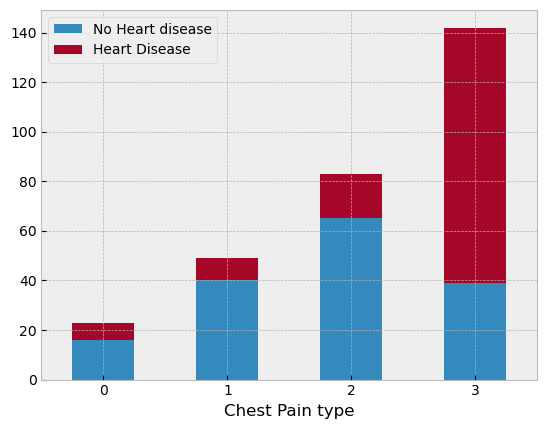

In [9]:
pd.crosstab(data['cp'],data['condition']).plot(kind='bar',stacked=True);
plt.xlabel('Chest Pain type')
plt.xticks(rotation=0)
plt.legend(["No Heart disease","Heart Disease"]);

cp: chest pain type

> * Value 0: typical angina: Chest pain related to decrease of supply to the heart. 
> * Value 1: atypical angina : chest pain not related to heart.
> * Value 2: non-anginal pain : Typicallyesophageal spams (non heart related)
> * Value 3: asymptomatic : Chest pain not showing signs of disease

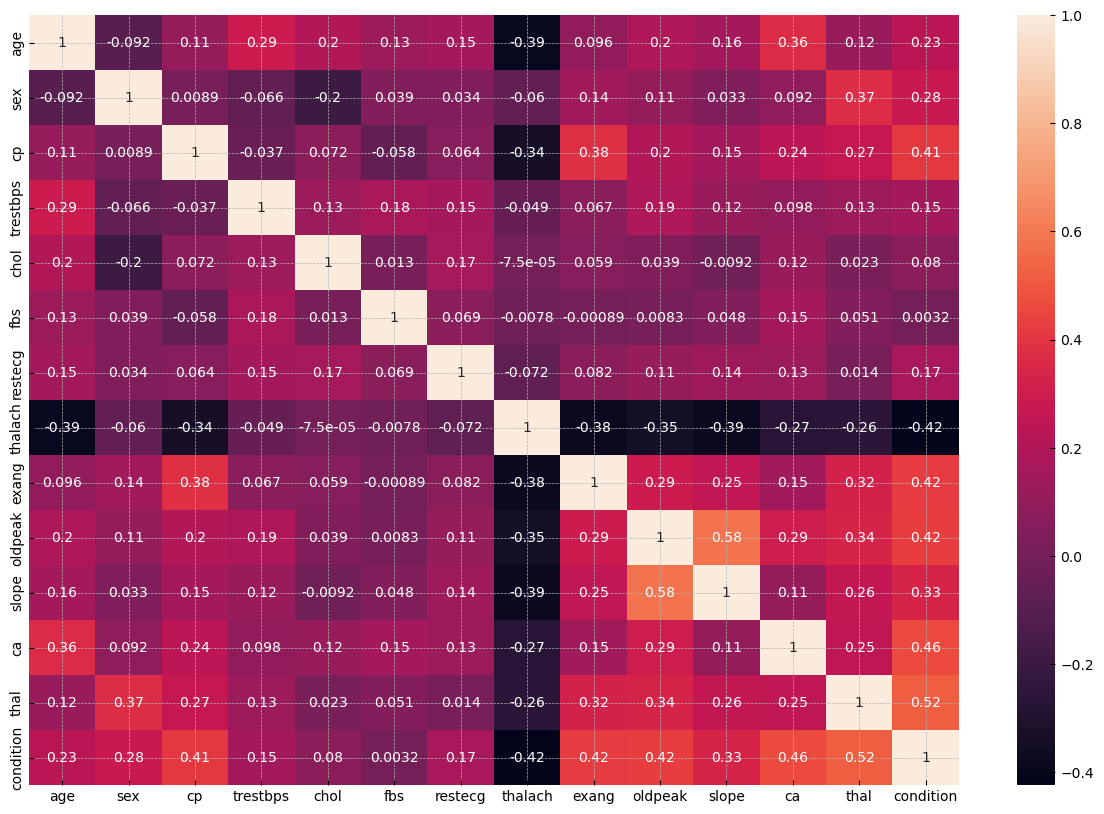

In [10]:
### Making a correlation matrix
corr = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr,annot=True);

## Preparing data for modelling

In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


#### Splitting data into X and Y

In [12]:
x = data.drop('condition',axis=1)

y = data['condition']

#setting up random seed
np.random.seed(0)

#Splitting into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Modelling

We're going to use 3 models :
1. Logistic regression
2. K-Nearest Neighbours classifier
3. Random Forest Classifier

In [32]:
from xgboost import XGBClassifier
# Put models in a dictionary
models = {'Logistic Regression':LogisticRegression(max_iter=1000),
         'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier(),
         'XGBoost Random Forest':XGBRFClassifier(),
         'Extra trees Classifier':ExtraTreesClassifier(n_estimators=100,criterion='gini',max_depth=None,
                                                       min_samples_split=10,min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                                       max_leaf_nodes=100,min_impurity_decrease=0.0,bootstrap=True,
                                                       oob_score=True,n_jobs=-1,random_state=10,verbose=0,warm_start=True,
                                                       class_weight=None,ccp_alpha=0,max_samples=None)}

# Function to fit and score models
def fit_n_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    
    #Model scores
    model_scores={}
    
    # Fit and train different models
    for name,model in models.items():
        model.fit(x_train,y_train)
        
        #Evaluate and score
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [33]:
scores = fit_n_score(models,x_train,x_test,y_train,y_test)
for model,score in scores.items():
    print('Accuracy score for',model,'is :',(score*100).round(2),'%')

Accuracy score for Logistic Regression is : 83.33 %
Accuracy score for KNN is : 60.0 %
Accuracy score for Random Forest is : 75.0 %
Accuracy score for XGBoost Random Forest is : 76.67 %
Accuracy score for Extra trees Classifier is : 86.67 %


## Model Comparison

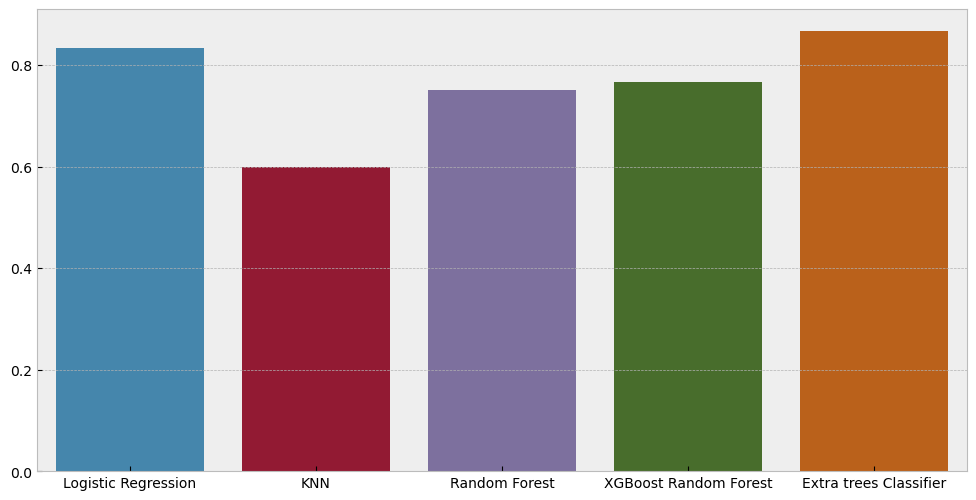

In [36]:
fig,ax=plt.subplots(figsize=(12,6))
model_compare = pd.DataFrame(data=scores,index=['Accuracy'])
sns.barplot(model_compare);

 ## Tuning our model

In [16]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of parameters for KNN 
neighbors = range(1,21)

#Setup instances
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

Maximum KNN score on the test data : 65.00%


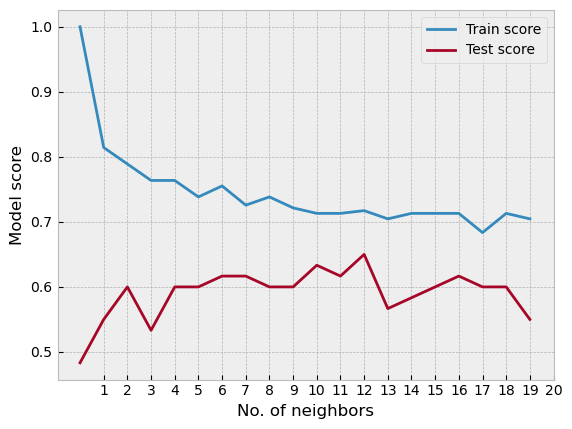

In [17]:
sns.lineplot(train_scores,label='Train score')
sns.lineplot(test_scores,label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('No. of neighbors')
plt.ylabel('Model score');
print(f'Maximum KNN score on the test data : {max(test_scores)*100:.2f}%')

Even after hyperparameter tuning, KNN was able to deliver a result of only 65%. Hence we move on to other models

## Hyperparameter tuning with RandomizedSearchCV

In [18]:
# Hyperparameter grid for LogisticRegression 
params_log = {'C':np.logspace(-4,4,20),
              "solver":['liblinear']}

#Hyperparameters grid for RandomForest
params_rf = {'n_estimators':np.arange(10,1000,50),
            'max_depth':[None,3,5,10],
            'min_samples_split':np.arange(2,20,2),
            'min_samples_leaf':np.arange(1,20,2)}

#Hyperparameters for XGBRFClassifier
params_xgrf = {'n_estimators':[10,50],
               'max_depth':range(8,15),
               'random_state':[7,42]}
              #'min_child_weight':[2,3,4],
              #'num_parallel_tree':range(1,13)}

#### 1. Logistic regression

In [19]:
np.random.seed(42)

rs_log = RandomizedSearchCV(LogisticRegression(),params_log,
                           cv=5,n_iter=20,verbose=True)

rs_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [21]:
print('Improved Logistic regression score :',rs_log.score(x_test,y_test)*100,'%')

Improved Logistic regression score : 85.0 %


#### 2. Random Forest

In [22]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),params_rf,
                           cv=5,n_iter=20,verbose=True)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [23]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [24]:
print('Improved Random Forest score :',rs_rf.score(x_test,y_test)*100,'%')

Improved Random Forest score : 76.66666666666667 %


#### 3. XBGRF Classifier

In [25]:
np.random.seed(42)

rs_xgrf = RandomizedSearchCV(XGBRFClassifier(),params_xgrf,
                           cv=5,n_iter=28,verbose=True)

rs_xgrf.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=No...
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             objective='binary:logistic',
                                             predictor=None, random_state=None,
                                             reg_alpha=None, ...),
                   n_iter=28,
                   param_distributions={'max_depth': range(8, 15),
                                        'n_estimators': [10, 50],
                                        'random_state': [7, 42]},
                   verbose=True)

In [26]:
rs_xgrf.best_params_

{'random_state': 7, 'n_estimators': 10, 'max_depth': 8}

In [27]:
print('Improved XGB classifier score :',rs_xgrf.score(x_test,y_test)*100,'%')

Improved XGB classifier score : 78.33333333333333 %


Logistic Regression with the RandomizedSearchCV gives the best results , hence conducting an exhaustive search for best hyperparameters

### GridSearchCV for Logistic Regression model

In [28]:
# Hyperparameter grid for LogisticRegression 
params_log = {'C':np.logspace(-4,4,20),
              "solver":['liblinear'],
             'max_iter':[1000],
             'random_state':[0,7,42]}

gs_log = GridSearchCV(LogisticRegression(),params_log,cv=5,verbose=True)

gs_log.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [1000], 'random_state': [0, 7, 42],
                         'solver': ['liblinear']},
             verbose=True)

In [29]:
gs_log.best_params_

{'C': 4.281332398719396,
 'max_iter': 1000,
 'random_state': 0,
 'solver': 'liblinear'}

In [30]:
gs_log.score(x_test,y_test)

0.85

In [37]:
print('Improved Logistic Regressor score :',gs_log.score(x_test,y_test)*100,'%')

Improved Logistic Regressor score : 85.0 %


### Evaluating models beyond accuracy
1. ROC and AUC score
2. Confusion Matrix
3. Classification Report
4. Precision
5. Recall
6. F1-score

<Figure size 800x600 with 0 Axes>

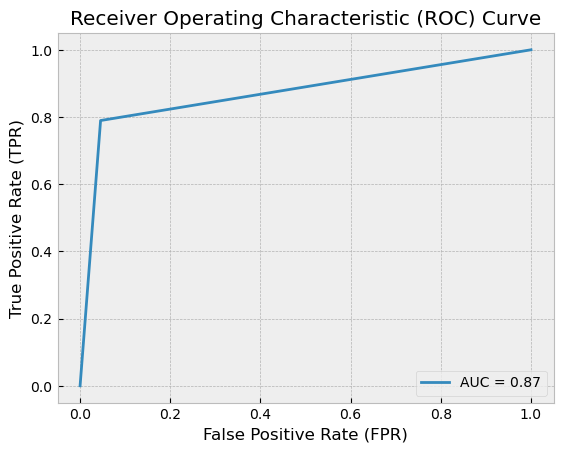

In [59]:
# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)

# Create an instance of the RocCurveDisplay class
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=gs_log)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
roc_display.plot();
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
# Display the AUC score in the legend
plt.legend([f'AUC = {roc_auc:.2f}'], loc='lower right')
plt.show();

<Figure size 800x600 with 0 Axes>

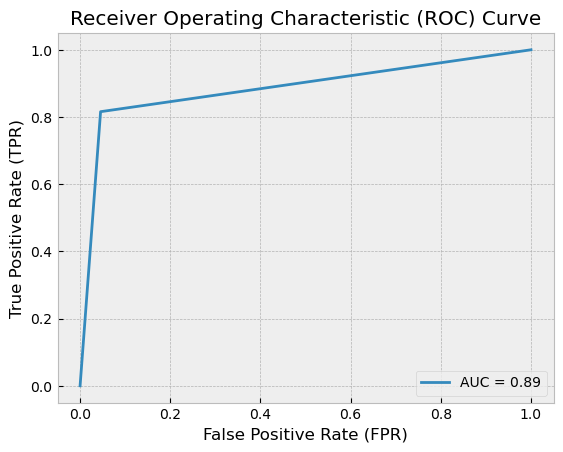

In [61]:
y_preds_etc = models['Extra trees Classifier'].predict(x_test)
# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_preds_etc)
roc_auc = auc(fpr, tpr)

# Create an instance of the RocCurveDisplay class
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=models['Extra trees Classifier'])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
roc_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
# Display the AUC score in the legend
plt.legend([f'AUC = {roc_auc:.2f}'], loc='lower right')
plt.show();

## Confusion Matrix for Extra Trees Classifier

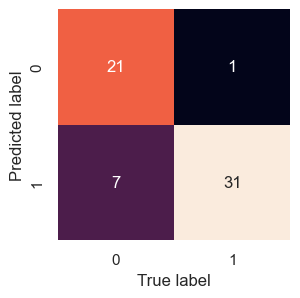

In [71]:
sns.set(font_scale=1)

def plot_conf_matrix(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_matrix(y_test,y_preds_etc)

## Classification Report 

In [73]:
print(classification_report(y_test,y_preds_etc))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        22
           1       0.97      0.82      0.89        38

    accuracy                           0.87        60
   macro avg       0.86      0.89      0.86        60
weighted avg       0.89      0.87      0.87        60



## Calculating evaluation metrics using cross-validation

In [74]:
# Create a new classifier with ExtraTreesClassifier
clf = models['Extra trees Classifier']

In [93]:
# Cross-validated Accuracy
cv_acc = cross_val_score(clf,x,y,cv=10,scoring="accuracy")
print("Accuracy :",np.mean(cv_acc)*100)

Accuracy : 82.13793103448278


In [94]:
# Cross-validated Precision
cv_prec = cross_val_score(clf,x,y,cv=10,scoring="precision")
print("Precision :",np.mean(cv_prec)*100)

Precision : 84.22631290278349


In [95]:
# Cross-validated Recall
cv_recall = cross_val_score(clf,x,y,cv=10,scoring="recall")
print("Recall :",np.mean(cv_recall)*100)

Recall : 77.58241758241759


In [96]:
# Cross-validated F1-Score
cv_f1 = cross_val_score(clf,x,y,cv=10,scoring="f1")
print("F1-Score :",np.mean(cv_f1)*100)

F1-Score : 78.20355164548714


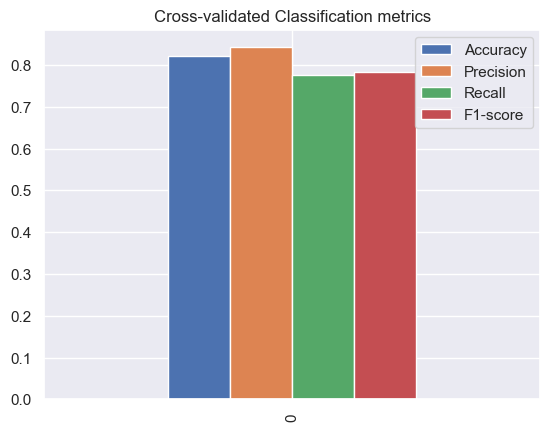

In [105]:
cv_metrics = pd.DataFrame({"Accuracy": np.mean(cv_acc),
                         "Precision": np.mean(cv_prec),
                         "Recall": np.mean(cv_recall),
                         "F1-score":np.mean(cv_f1)},
                          index=[0])
cv_metrics.plot.bar(title='Cross-validated Classification metrics',
                   legend=True);


# Feature Importance

In [108]:
clf

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0, max_leaf_nodes=100,
                     min_samples_split=10, n_jobs=-1, oob_score=True,
                     random_state=10, warm_start=True)

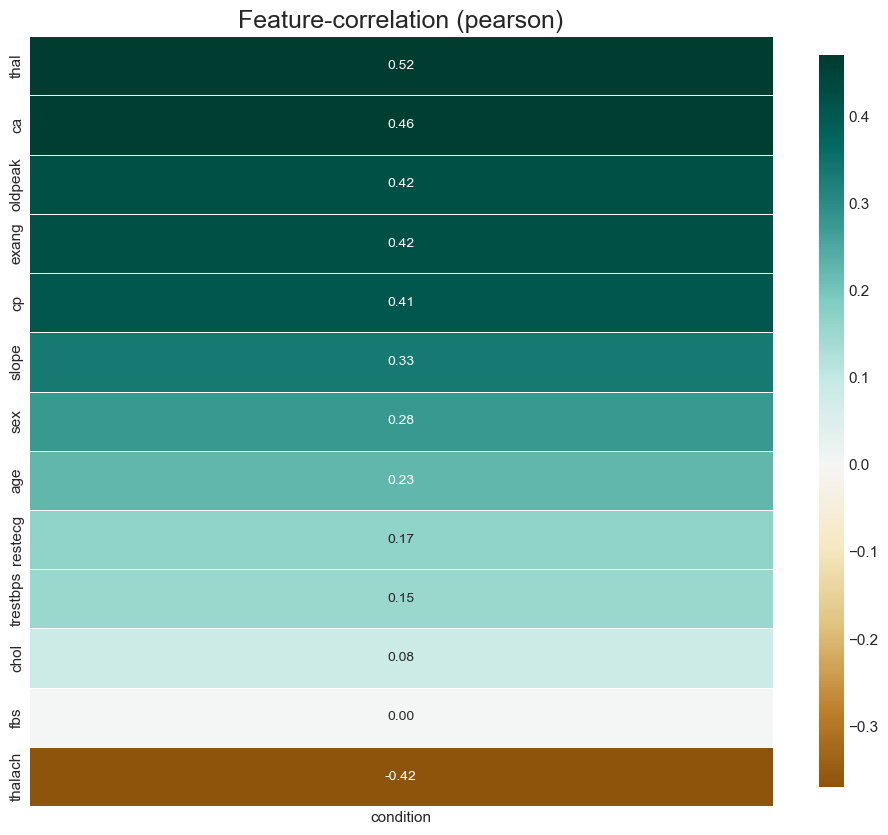

In [112]:
klib.corr_plot(data,target='condition');